<a href="https://colab.research.google.com/github/Awynimantha/Research-ML-scripts/blob/main/Decision_Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import h5py
import numpy as np

import matplotlib.pyplot as plt
from scipy import signal
import gc as gc
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.neural_network import MLPClassifier
import tensorflow as tf

print("Num GPUs Available:", len(tf.config.list_physical_devices('GPU')))

from google.colab import drive
drive.mount('/content/drive')

file1 = h5py.File("/content/drive/MyDrive/signal data/big-benign.h5", "r")
file2 = h5py.File("/content/drive/MyDrive/signal data/big-infected.h5", "r")
file3 = h5py.File("/content/drive/MyDrive/signal data/test-benign-idle-5.h5", "r")
file4 = h5py.File("/content/drive/MyDrive/signal data/test-infected-idle-5.h5", "r")
file5 = h5py.File("/content/drive/MyDrive/signal data/test-data.h5", "r")

Num GPUs Available: 0
Mounted at /content/drive


In [ ]:
import numpy as np

file_path = "/content/drive/MyDrive/nicv/(4096,2048).npy"
nicv_values = np.load(file_path)
print(nicv_values)

[3.1869223  1.2546824  0.14383285 ... 0.3327192  0.32000425 0.30510756]


In [ ]:
import numpy as np
nicv_scores = nicv_values
n_components = 100

keys =  list(file1.keys())[:100] + list(file2.keys())[0:100] + list(file1.keys())[100:] + list(file2.keys())[100:]
X_batch = []
y_batch = []
for name in keys:
  data = []
  label = 0
  if name in file1:
    label = 0
    data = file1[name]
  else:
    label = 1
    data = file2[name]
  data_tensor = tf.convert_to_tensor(data, dtype=tf.float32)
  Zxx = tf.signal.stft(data_tensor, frame_length=4096, frame_step=2048, fft_length=4096)
  magnitude = tf.abs(Zxx).numpy().reshape(Zxx.shape[0], -1)
  selected_indices = np.argsort(nicv_scores)[-n_components:]
  reduced_features = magnitude[:, selected_indices]
  final_features = np.mean(reduced_features, axis=0)
  X_batch.append(final_features)
  y_batch.append(label)

# Convert lists to numpy arrays
X_batch = np.array(X_batch)
y_batch = np.array(y_batch)

# Save to .npy files
np.save('/content/drive/MyDrive/stft_data/X_batch(4096,2048).npy', X_batch)
np.save('/content/drive/MyDrive/stft_data/y_batch(4096,2048).npy', y_batch)


NameError: name 'nicv_values' is not defined

In [ ]:
import numpy as np

# Convert lists to numpy arrays
X_batch = np.array(X_batch)
y_batch = np.array(y_batch)

# Save to .npy files
np.save('/content/drive/MyDrive/stft_data/X_batch(4096,2048).npy', X_batch)
np.save('/content/drive/MyDrive/stft_data/y_batch(4096,2048).npy', y_batch)


In [ ]:
# Load from .npy files
X_batch_loaded = np.load('/content/drive/MyDrive/stft_data/X_batch(4096,2048).npy')
y_batch_loaded = np.load('/content/drive/MyDrive/stft_data/y_batch(4096,2048).npy')


In [ ]:
import numpy as np
import h5py
import random
import tensorflow as tf
from tensorflow.keras.utils import Sequence
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load from .npy files
X_batch_loaded = np.load('/content/drive/MyDrive/stft_data/X_batch(4096,2048).npy')
y_batch_loaded = np.load('/content/drive/MyDrive/stft_data/y_batch(4096,2048).npy')


# Extract all data in one go
# generatori = STFTDataGenerator(file1, file2, batch_size=len(file1.keys()) + len(file2.keys()), n_components=100)
# X, y = generatori[0]  # Get all data

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_batch_loaded, y_batch_loaded, test_size=0.2, random_state=42)

# Train Random Forest clcomassifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, max_depth=20)
rf_model.fit(X_train, y_train)

# Evaluate the model
y_pred = rf_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"Random Forest Accuracy: {accuracy:.4f}")


Random Forest Accuracy: 0.9706


In [ ]:
from sklearn.metrics import classification_report
y_pred = rf_model.predict(np.array(X_test))
y_pred = np.round(y_pred).flatten()
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      0.94      0.97        53
           1       0.94      1.00      0.97        49

    accuracy                           0.97       102
   macro avg       0.97      0.97      0.97       102
weighted avg       0.97      0.97      0.97       102



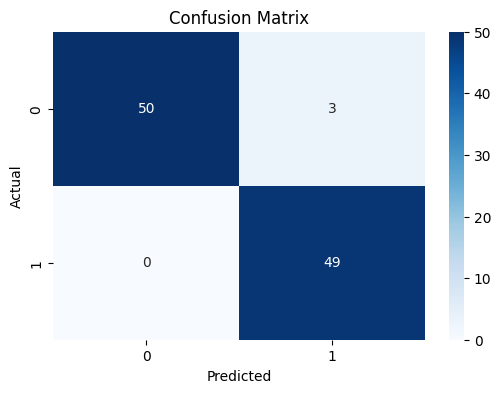

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


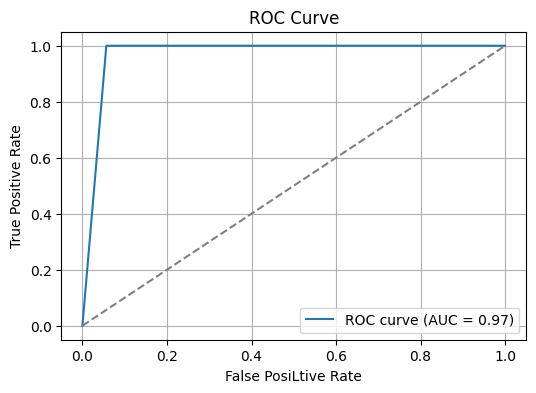

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Predict probabilities
y_pred_probs = rf_model.predict(np.array(X_test))

# Get FPR, TPR for different thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)
roc_auc = auc(fpr, tpr)

# Plot
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f"ROC curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # random guess line
plt.xlabel("False PosiLtive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
nicv_scores = nicv_values
n_components = 100

keys =  list(file3.keys())[:100] + list(file4.keys())[0:100] + list(file3.keys())[100:] + list(file4.keys())[100:]
X_test_batch = []
y_test_batch = []
for name in keys:
  data = []
  label = 0
  if name in file3:
    label = 0
    data = file3[name]
  else:
    label = 1
    data = file4[name]
  data_tensor = tf.convert_to_tensor(data, dtype=tf.float32)
  Zxx = tf.signal.stft(data_tensor, frame_length=4096, frame_step=2048, fft_length=4096)
  magnitude = tf.abs(Zxx).numpy().reshape(Zxx.shape[0], -1)
  selected_indices = np.argsort(nicv_scores)[-n_components:]
  reduced_features = magnitude[:, selected_indices]
  final_features = np.mean(reduced_features, axis=0)
  X_test_batch.append(final_features)
  y_test_batch.append(label)




/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


In [ ]:
nicv_scores = nicv_values
n_components = 100

keys =  list(file5.keys())
for name in keys:

  data = []
  label = 0
  if(file5[name].attrs.get('label') == "benign"):
    label = 0
    data = file5[name]
  else:
    label = 1
    data = file5[name]
  data_tensor = tf.convert_to_tensor(data, dtype=tf.float32)
  Zxx = tf.signal.stft(data_tensor, frame_length=4096, frame_step=2048, fft_length=4096)
  magnitude = tf.abs(Zxx).numpy().reshape(Zxx.shape[0], -1)
  selected_indices = np.argsort(nicv_scores)[-n_components:]
  reduced_features = magnitude[:, selected_indices]
  final_features = np.mean(reduced_features, axis=0)
  X_test_batch.append(final_features)
  y_test_batch.append(label)



# Result with noise data

In [ ]:
import numpy as np

# Convert lists to numpy arrays
X_batch = np.array(X_test_batch)
y_batch = np.array(y_test_batch)

# Save to .npy files
np.save('/content/drive/MyDrive/stft_data/X_batch(4096,2048)_test_noise.npy', X_batch)
np.save('/content/drive/MyDrive/stft_data/y_batch(4096,2048)_test_noise.npy', y_batch)


In [ ]:
X_test_batch = np.load("/content/drive/MyDrive/stft_data/X_batch(4096,2048)_test_noise.npy", "r")
y_test_batch = np.load("/content/drive/MyDrive/stft_data/y_batch(4096,2048)_test_noise.npy", "r")

In [ ]:
temp_X = X_test_batch
temp_y = y_test_batch

In [ ]:
# prompt: turn np array in to a list

# Convert the numpy array X_test_batch to a list
X_test_batch = X_test_batch.tolist()

# Convert the numpy array y_test_batch to a list
y_test_batch = y_test_batch.tolist()




In [ ]:
import numpy as np
import tensorflow as tf

def add_gaussian_noise(signal, mean=0.0, std=0.005): #0.002,0.003
    noise = np.random.normal(mean, std, size=signal.shape)
    return signal + noise

nicv_scores = nicv_values
n_components = 100

keys = list(file3.keys())[3:8] + list(file4.keys())[3:9]


for name in keys:
    label = 0
    if name in file3:
        label = 0
        data = file3[name]
    else:
        label = 1
        data = file4[name]

    # 👉 Add noise here
    data_noisy = add_gaussian_noise(np.array(data))

    # Tensor conversion and STFT
    data_tensor = tf.convert_to_tensor(data_noisy, dtype=tf.float32)
    Zxx = tf.signal.stft(data_tensor, frame_length=4096, frame_step=2048, fft_length=4096)
    magnitude = tf.abs(Zxx).numpy().reshape(Zxx.shape[0], -1)

    # NICV-based feature selection
    selected_indices = np.argsort(nicv_scores)[-n_components:]
    reduced_features = magnitude[:, selected_indices]

    # Final feature for model
    final_features = np.mean(reduced_features, axis=0)
    X_test_batch.append(final_features)
    y_test_batch.append(label)


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


In [ ]:
# Evaluate the model
y_pred = rf_model.predict(X_test_batch)
accuracy = accuracy_score(y_test_batch, y_pred)

print(f"Random Forest Accuracy: {accuracy:.4f}")

Random Forest Accuracy: 0.8200


In [ ]:
from sklearn.metrics import classification_report
y_pred = rf_model.predict(np.array(X_test_batch))
y_pred = np.round(y_pred).flatten()
print(classification_report(y_test_batch, y_pred))


              precision    recall  f1-score   support

           0       0.80      0.89      0.84        53
           1       0.85      0.74      0.80        47

    accuracy                           0.82       100
   macro avg       0.83      0.82      0.82       100
weighted avg       0.82      0.82      0.82       100



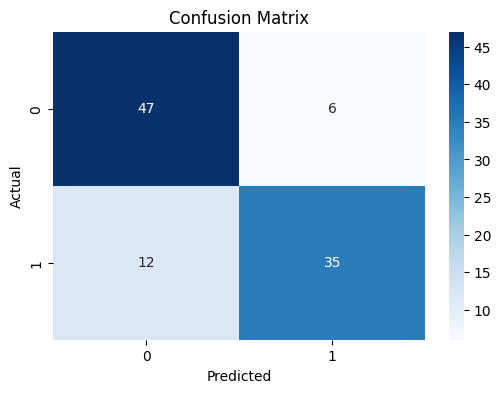

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test_batch, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


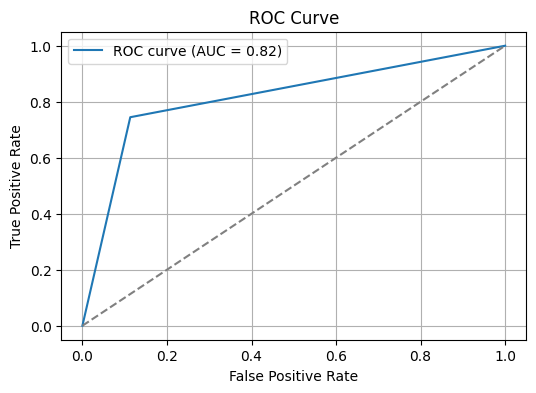

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Predict probabilities
y_pred_probs = rf_model.predict(np.array(X_test_batch))

# Get FPR, TPR for different thresholds
fpr, tpr, thresholds = roc_curve(y_test_batch, y_pred_probs)
roc_auc = auc(fpr, tpr)

# Plot
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f"ROC curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # random guess line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
file6 = h5py.File("/content/drive/MyDrive/signal data/benign-single.h5", "r")
file7 = h5py.File("/content/drive/MyDrive/signal data/infected-gamesall.h5", "r")
file8 = h5py.File("/content/drive/MyDrive/signal data/infected-edge.h5", "r")
file9 = h5py.File("/content/drive/MyDrive/signal data/benign-gamesall.h5", "r")

# Infected gamesall

In [ ]:
import numpy as np

file_path = "/content/drive/MyDrive/nicv/(4096,2048).npy"
nicv_values = np.load(file_path)

nicv_scores = nicv_values
n_components = 100
file = file7
keys =  list(file.keys())
X_test_batch_gamesall = []
y_test_batch_gamesall = []
for name in keys:
  data = []
  label = 1
  data = file[name]

  data_tensor = tf.convert_to_tensor(data, dtype=tf.float32)
  Zxx = tf.signal.stft(data_tensor, frame_length=4096, frame_step=2048, fft_length=4096)
  magnitude = tf.abs(Zxx).numpy().reshape(Zxx.shape[0], -1)
  selected_indices = np.argsort(nicv_scores)[-n_components:]
  reduced_features = magnitude[:, selected_indices]
  final_features = np.mean(reduced_features, axis=0)
  X_test_batch_gamesall.append(final_features)
  y_test_batch_gamesall.append(label)




/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


In [ ]:
from sklearn.metrics import classification_report
y_pred = rf_model.predict(np.array(X_test_batch_gamesall))
y_pred = np.round(y_pred).flatten()
print(classification_report(y_test_batch_gamesall, y_pred))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00       0.0
           1       0.00      0.00      0.00       3.0

    accuracy                           0.00       3.0
   macro avg       0.00      0.00      0.00       3.0
weighted avg       0.00      0.00      0.00       3.0



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_

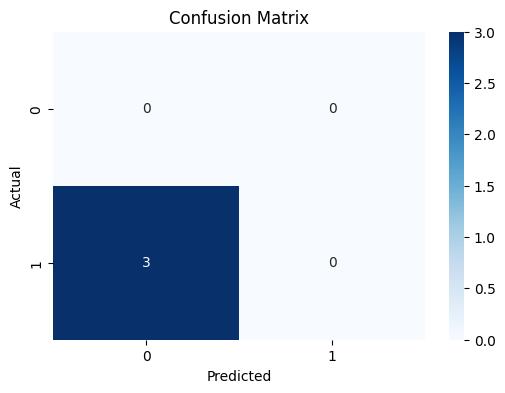

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test_batch_gamesall, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [ ]:
import numpy as np

file_path = "/content/drive/MyDrive/nicv/(4096,2048).npy"
nicv_values = np.load(file_path)

nicv_scores = nicv_values
n_components = 100
file = file6
keys =  list(file.keys())
X_test_batch_vm = []
y_test_batch_vm = []
for name in keys:
  data = []
  label = 0
  data = file[name]

  data_tensor = tf.convert_to_tensor(data, dtype=tf.float32)
  Zxx = tf.signal.stft(data_tensor, frame_length=4096, frame_step=2048, fft_length=4096)
  magnitude = tf.abs(Zxx).numpy().reshape(Zxx.shape[0], -1)
  selected_indices = np.argsort(nicv_scores)[-n_components:]
  reduced_features = magnitude[:, selected_indices]
  final_features = np.mean(reduced_features, axis=0)
  X_test_batch_vm.append(final_features)
  y_test_batch_vm.append(label)




/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


In [ ]:
from sklearn.metrics import classification_report
y_pred = rf_model.predict(np.array(X_test_batch_vm))
y_pred = np.round(y_pred).flatten()
print(classification_report(y_test_batch_vm, y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


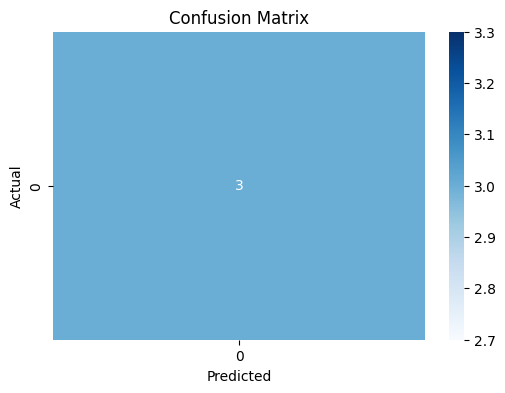

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test_batch_vm, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [ ]:
import numpy as np

file_path = "/content/drive/MyDrive/nicv/(4096,2048).npy"
nicv_values = np.load(file_path)

nicv_scores = nicv_values
n_components = 100
file = file9
keys =  list(file.keys())
X_test_batch_infected_gamesall = []
y_test_batch_infected_gamesall = []
for name in keys:
  data = []
  label = 1
  data = file[name]

  data_tensor = tf.convert_to_tensor(data, dtype=tf.float32)
  Zxx = tf.signal.stft(data_tensor, frame_length=4096, frame_step=2048, fft_length=4096)
  magnitude = tf.abs(Zxx).numpy().reshape(Zxx.shape[0], -1)
  selected_indices = np.argsort(nicv_scores)[-n_components:]
  reduced_features = magnitude[:, selected_indices]
  final_features = np.mean(reduced_features, axis=0)
  X_test_batch_infected_gamesall.append(final_features)
  y_test_batch_infected_gamesall.append(label)




/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


In [ ]:
from sklearn.metrics import classification_report
y_pred = rf_model.predict(np.array(X_test_batch_infected_gamesall))
y_pred = np.round(y_pred).flatten()
print(classification_report(y_test_batch_infected_gamesall, y_pred))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.12      0.22         8

    accuracy                           0.12         8
   macro avg       0.50      0.06      0.11         8
weighted avg       1.00      0.12      0.22         8



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


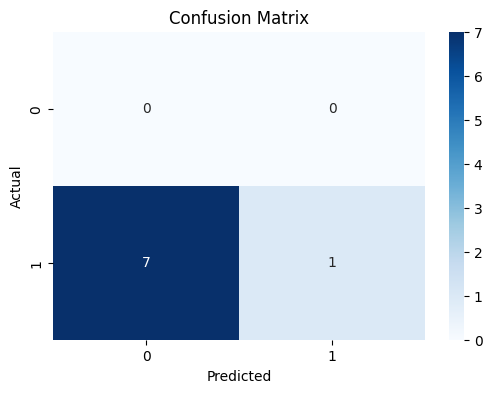

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test_batch_infected_gamesall, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [ ]:
import numpy as np

file_path = "/content/drive/MyDrive/nicv/(4096,2048).npy"
nicv_values = np.load(file_path)

nicv_scores = nicv_values
n_components = 100
file = file8
keys =  list(file.keys())
X_test_batch_infected_gamesall = []
y_test_batch_infected_gamesall = []
for name in keys:
  data = []
  label = 0
  data = file[name]

  data_tensor = tf.convert_to_tensor(data, dtype=tf.float32)
  Zxx = tf.signal.stft(data_tensor, frame_length=4096, frame_step=2048, fft_length=4096)
  magnitude = tf.abs(Zxx).numpy().reshape(Zxx.shape[0], -1)
  selected_indices = np.argsort(nicv_scores)[-n_components:]
  reduced_features = magnitude[:, selected_indices]
  final_features = np.mean(reduced_features, axis=0)
  X_test_batch_infected_gamesall.append(final_features)
  y_test_batch_infected_gamesall.append(label)




/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/constant_op.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  return ops.EagerTensor(value, ctx.device_name, dtype)


In [ ]:
from sklearn.metrics import classification_report
y_pred = rf_model.predict(np.array(X_test_batch_infected_gamesall))
y_pred = np.round(y_pred).flatten()
print(classification_report(y_test_batch_infected_gamesall, y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


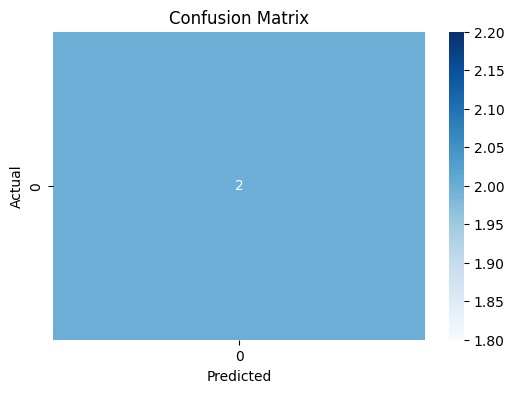

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test_batch_infected_gamesall, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()
